In [1]:
#Librerías
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt
import math as mt
from IPython.display import display
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from scipy import stats

In [2]:
#Todos los datos
df = pd.read_excel('./datosejercicioevaluacionanchuras.xlsx')

#Datos del Predinástico Temprano
df_1 = df[df['Época histórica']==1].copy()

#Datos del Predinástico Tardío
df_2 = df[df['Época histórica']==2].copy()

,Medida,Predinástico Temprano,Predinástico Tardío
0,count,30.0,30.0
1,mean,131.533333,132.466667
2,std,0.819307,1.008014
3,min,130.0,131.0
4,25%,131.0,132.0
5,50%,131.5,133.0
6,75%,132.0,133.0
7,max,134.0,135.0
8,Moda,"131, 132",133
9,Rango,4.0,4.0


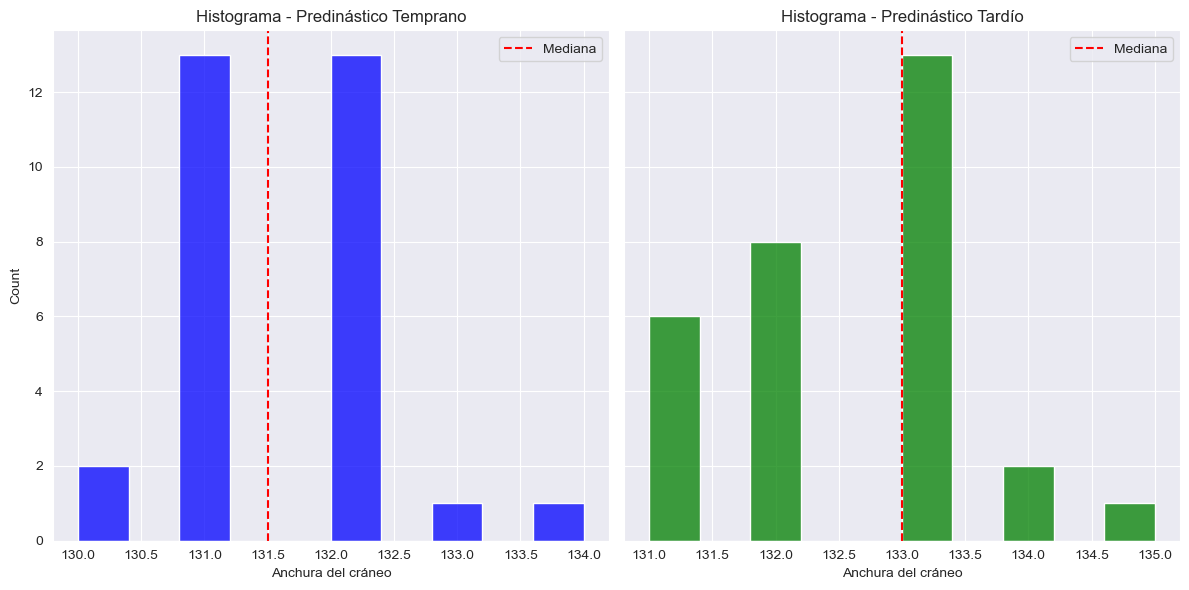

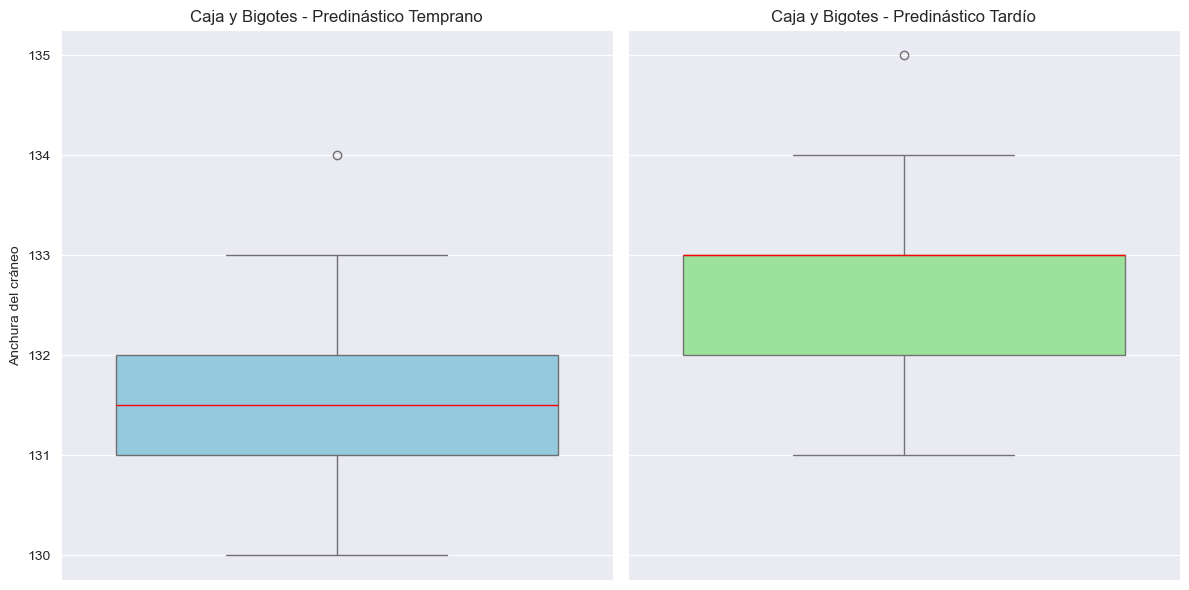

In [3]:
#Para ajustar el formato del grid de las representaciones
sns.set_style('darkgrid')

def analizar_periodos(df_1, df_2, columna_valor):

    # Crear un DataFrame combinado para las estadísticas
    medidas_combinadas = {"Medida": []}
    nombres_medidas = [
        "count", "mean", "std", "min", "25%", "50%", "75%", "max",
        "Moda", "Rango", "Varianza", "Coeficiente Pearson", "Coeficiente Fisher", "Coeficiente Curtosis"
    ]
    medidas_combinadas["Medida"] = nombres_medidas

    # Calcular estadísticas para el primer período
    valores1 = df_1[columna_valor].describe()
    moda1 = ", ".join(map(str, df_1[columna_valor].mode().tolist()))
    rango1 = valores1["max"] - valores1["min"]
    varianza1 = valores1["std"]**2
    coef_var_P1 = valores1["std"] / valores1["mean"]
    df_1['Xi - Media'] = df_1[columna_valor] - valores1["mean"]
    df_1['(Xi - Media)*3'] = df_1['Xi - Media']**3
    df_1['(Xi - Media)*4'] = df_1['Xi - Media']**4
    Coef_Fisher1 = df_1['(Xi - Media)*3'].sum() / ((len(df_1) - 1) * mt.pow(valores1["std"], 3))
    coeficiente_Curtosis1 = (
        df_1['(Xi - Media)*4'].sum() / ((len(df_1) - 1) * mt.pow(valores1["std"], 4)) - 3
    )

    medidas_periodo1 = [
        valores1["count"], valores1["mean"], valores1["std"], valores1["min"],
        valores1["25%"], valores1["50%"], valores1["75%"], valores1["max"],
        moda1, rango1, varianza1, coef_var_P1, Coef_Fisher1, coeficiente_Curtosis1
    ]
    medidas_combinadas["Predinástico Temprano"] = medidas_periodo1

    # Calcular estadísticas para el segundo período
    valores2 = df_2[columna_valor].describe()
    moda2 = ", ".join(map(str, df_2[columna_valor].mode().tolist()))
    rango2 = valores2["max"] - valores2["min"]
    varianza2 = valores2["std"]**2
    coef_var_P2 = valores2["std"] / valores2["mean"]
    df_2['Xi - Media'] = df_2[columna_valor] - valores2["mean"]
    df_2['(Xi - Media)*3'] = df_2['Xi - Media']**3
    df_2['(Xi - Media)*4'] = df_2['Xi - Media']**4
    Coef_Fisher2 = df_2['(Xi - Media)*3'].sum() / ((len(df_2) - 1) * mt.pow(valores2["std"], 3))
    coeficiente_Curtosis2 = (
        df_2['(Xi - Media)*4'].sum() / ((len(df_2) - 1) * mt.pow(valores2["std"], 4)) - 3
    )

    medidas_periodo2 = [
        valores2["count"], valores2["mean"], valores2["std"], valores2["min"],
        valores2["25%"], valores2["50%"], valores2["75%"], valores2["max"],
        moda2, rango2, varianza2, coef_var_P2, Coef_Fisher2, coeficiente_Curtosis2
    ]
    medidas_combinadas["Predinástico Tardío"] = medidas_periodo2

    # Crear y mostrar el DataFrame combinado
    df_combinado = pd.DataFrame(medidas_combinadas)
    display(df_combinado)

    # Graficar histogramas
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    sns.histplot(df_1[columna_valor], bins=10, ax=axes[0], kde=False, color='blue')
    axes[0].axvline(valores1["50%"], color='red', linestyle='--', label='Mediana')
    axes[0].set_title("Histograma - Predinástico Temprano")
    axes[0].legend()

    sns.histplot(df_2[columna_valor], bins=10, ax=axes[1], kde=False, color='green')
    axes[1].axvline(valores2["50%"], color='red', linestyle='--', label='Mediana')
    axes[1].set_title("Histograma - Predinástico Tardío")
    axes[1].legend()
    plt.tight_layout()
    plt.show()

    # Graficar diagramas de caja y bigotes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    sns.boxplot(y=df_1[columna_valor], ax=axes[0], color='skyblue', medianprops={'color': 'red'})
    axes[0].set_title("Caja y Bigotes - Predinástico Temprano")

    sns.boxplot(y=df_2[columna_valor], ax=axes[1], color='lightgreen', medianprops={'color': 'red'})
    axes[1].set_title("Caja y Bigotes - Predinástico Tardío")
    plt.tight_layout()
    plt.show()

# Ejecutar la función
analizar_periodos(df_1, df_2, 'Anchura del cráneo')


In [4]:
#EJERCICIO 1
#APARTADO B

#H0 -> La muestra 1-2 sigue una distribución normal
#H1 -> La muestra 1-2 no sigue una distribución normal

def test_kolmogorov(datos):
    datos = np.array(datos['Anchura del cráneo']).reshape(-1, 1) #Aseguramos la forma
    scaler = StandardScaler() #Standarscaler de scktlearn
    datos = scaler.fit_transform(datos) #Normalizar
    datos = datos.flatten() #Matriz unidimensional

    #Test de Kolmogorov-Smirnov
    statistic, pvalue = stats.kstest(datos, 'norm')

    #Resultados
    print(f"Estadístico: {statistic:.4f}, Valor p: {pvalue:.4f}")
    if pvalue > 0.05:
        print('La muestra sigue una distribución normal')
    else:
        print('La muestra no sigue una distribución normal')

print('Los resultados para la submuestra del predinástico temprano son:')
test_kolmogorov(df_1)
print()
print('Los resultados de la submuestra del predinástico tardío son:')
test_kolmogorov(df_2)

Los resultados para la submuestra del predinástico temprano son:
Estadístico: 0.2460, Valor p: 0.0438
La muestra no sigue una distribución normal

Los resultados de la submuestra del predinástico tardío son:
Estadístico: 0.2381, Valor p: 0.0557
La muestra sigue una distribución normal


In [9]:
#EJERCICIO 1
#Apéndice al Apartado B

#Test de Shapiro-Wilk

def test_shapiro(datos):
    # Aseguramos la forma y normalizamos los datos
    datos = np.array(datos['Anchura del cráneo']).reshape(-1, 1)
    scaler = StandardScaler()  # Normalización
    datos = scaler.fit_transform(datos)
    datos = datos.flatten()  # Convertimos a una matriz unidimensional

    # Aplicamos el test de Shapiro-Wilk
    statistic, pvalue = stats.shapiro(datos)

    # Mostramos resultados
    print(f"Estadístico W: {statistic:.4f}, Valor p: {pvalue:.4f}")
    if pvalue > 0.05:
        print("La muestra sigue una distribución normal.")
    else:
        print("La muestra no sigue una distribución normal.")

# Ejecución del test para cada submuestra
print("Resultados para la submuestra del Predinástico Temprano:")
test_shapiro(df_1)

print("\nResultados para la submuestra del Predinástico Tardío:")
test_shapiro(df_2)

Resultados para la submuestra del Predinástico Temprano:
Estadístico W: 0.8378, Valor p: 0.0003
La muestra no sigue una distribución normal.

Resultados para la submuestra del Predinástico Tardío:
Estadístico W: 0.8832, Valor p: 0.0033
La muestra no sigue una distribución normal.


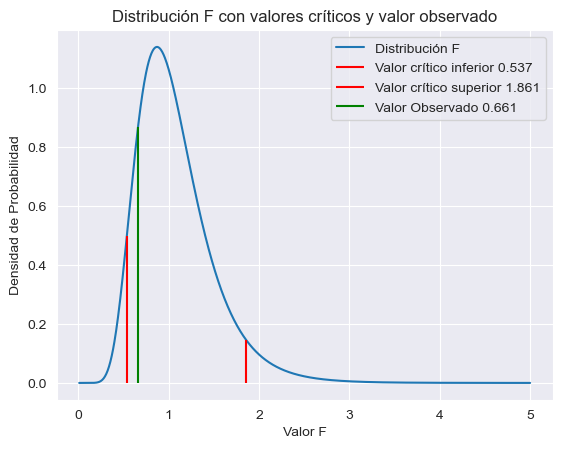

In [11]:
#EJERCICIO 2
#Apartado A

#Asumimos independencia de muestras

#Comprobamos en primer lugar si existe diferencia en la varianza de las muestras

#H0: Las muestras poseen varianzas poblacionales iguales S1 = S2
#H1: Las muestras poseen varianzas poblacionales diferentes S1! = S2

def dif_varianzas(datos1, datos2):
    
    valores1 = datos1['Anchura del cráneo'].describe()
    valores2 = datos2['Anchura del cráneo'].describe()

    #Grados de libertad y nivel de significación
    gl1 = valores1['count']-1
    gl2 = valores2['count']-1
    alfa_medios = 0.05

    #F Test
    qvalue_f_derecha = stats.f.ppf(1-alfa_medios, gl1, gl2)
    qvalue_f_izquierda = 1/qvalue_f_derecha
    fisher = mt.pow(valores1['std'], 2)/mt.pow(valores2['std'], 2)

    #Rrepresentación gráfica
    f_values = np.linspace(0.01, 5, 1000)
    f_distribucion = stats.f.pdf(f_values, gl1, gl2)
    plt.plot(f_values, f_distribucion, label='Distribución F')
    plt.vlines(qvalue_f_izquierda, 0, stats.f.pdf(qvalue_f_izquierda, gl1, gl2), colors='r', label='Valor crítico inferior %.3f' % qvalue_f_izquierda)
    plt.vlines(qvalue_f_derecha, 0, stats.f.pdf(qvalue_f_derecha, gl1, gl2), colors='r', label='Valor crítico superior %.3f' % qvalue_f_derecha)
    plt.vlines(fisher, 0, stats.f.pdf(fisher, gl1, gl2), colors='g', label='Valor Observado %.3f' % fisher)

    # Configurar la leyenda y etiquetas
    plt.legend()
    plt.xlabel('Valor F')
    plt.ylabel('Densidad de Probabilidad')
    plt.title('Distribución F con valores críticos y valor observado')

    # Mostrar la gráfica
    plt.show()

dif_varianzas(df_1, df_2)

In [19]:
#EJERCICIO 2

#Apartado A (Continuación)

def diferencia_medias(datos1, datos2):
    valores1 = datos1['Anchura del cráneo'].describe()
    valores2 = datos2['Anchura del cráneo'].describe()

    #Diferencia de medias, grados de libertad y error estándar
    mean_diff = valores1['mean'] - valores2['mean']
    n1 = valores1['count']
    n2 = valores2['count']
    s1 = valores1 ['std']
    s2 = valores2 ['std']
    gl = n1+n2-2
    standard_error = mt.sqrt((((n1*mt.pow(s1,2)+n2*mt.pow(s2,2))*((1/n1)+(1/n2)))/(gl)))

    #Cálculo de los intervalos de confianza
    intervalo_90 = stats.t.interval(0.90, gl, loc=mean_diff, scale=standard_error)
    intervalo_95 = stats.t.interval(0.95, gl, loc=mean_diff, scale=standard_error)
    intervalo_99 = stats.t.interval(0.99, gl, loc=mean_diff, scale=standard_error)

    print(f"El intervalo de confianza para la diferencia de medias con un 90% de confianza es: "
          f"({intervalo_90[0]:.4f}, {intervalo_90[1]:.4f})")
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"El intervalo de confianza para la diferencia de medias con un 95% de confianza es: "
          f"({intervalo_95[0]:.4f}, {intervalo_95[1]:.4f})")
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"El intervalo de confianza para la diferencia de medias con un 99% de confianza es: "
          f"({intervalo_99[0]:.4f}, {intervalo_99[1]:.4f})")

diferencia_medias(df_1, df_2)


El intervalo de confianza para la diferencia de medias con un 90% de confianza es: (-1.3365, -0.5301)
--------------------------------------------------------------------------------------------------------------
El intervalo de confianza para la diferencia de medias con un 95% de confianza es: (-1.4162, -0.4505)
--------------------------------------------------------------------------------------------------------------
El intervalo de confianza para la diferencia de medias con un 99% de confianza es: (-1.5758, -0.2909)


In [21]:
#EJERCICIO 2

#Apéndice al Apartado A

#H0: Las muestras poseen varianzas poblacionales iguales S1 = S2
#H1: Las muestras poseen varianzas poblacionales diferentes S1! = S2

#Test de Levene

def test_levene(datos1, datos2):

    stat, pvalue = stats.levene(datos1, datos2)
    print(f"Estadístico de Levene: {stat:.4f}, Valor p: {pvalue:.4f}")
    if pvalue > 0.05:
        print("No hay evidencias suficientes para descartar la hipótesis nula.")
    else:
        print("No hay evidencias suficientes para aceptar la hipótesis nula")

test_levene(df_1['Anchura del cráneo'], df_2['Anchura del cráneo'])

Estadístico de Levene: 0.6195, Valor p: 0.4344
No hay evidencias suficientes para descartar la hipótesis nula.


In [57]:
#EJERCICIO 2
#Apendíce al Apartado A (Continuación)

# Función Bootstrap para calcular el intervalo de confianza para la diferencia de medias
def bootstrap_ci(data1, data2, n_bootstrap=1000, alpha=0.05):
    
    boot_diffs = []  # Almacenará las diferencias de medias en cada iteración
    
    for _ in range(n_bootstrap):
        # Generar muestras bootstrap con reemplazo
        sample1 = resample(data1, replace=True)
        sample2 = resample(data2, replace=True)
        
        # Calcular diferencia de medias
        diff = np.mean(sample1) - np.mean(sample2)
        boot_diffs.append(diff)
    
    # Calcular percentiles para el intervalo de confianza
    lower = np.percentile(boot_diffs, 100 * (alpha / 2))
    upper = np.percentile(boot_diffs, 100 * (1 - alpha / 2))
    
    return lower, upper

# Aplicamos la función a los datos para distintos niveles de significación
ci_lower_90, ci_upper_90 = bootstrap_ci(df_1['Anchura del cráneo'], df_2['Anchura del cráneo'], alpha=0.1)
ci_lower_95, ci_upper_95 = bootstrap_ci(df_1['Anchura del cráneo'], df_2['Anchura del cráneo'], alpha=0.05)
ci_lower_99, ci_upper_99 = bootstrap_ci(df_1['Anchura del cráneo'], df_2['Anchura del cráneo'], alpha=0.01)

# Mostrar resultados
print(f"Intervalo de confianza Bootstrap al 90% de confianza para la diferencia de medias es:")
print(f"[{ci_lower_90:.4f}, {ci_upper_90:.4f}]")
print()
print(f"Intervalo de confianza Bootstrap al 95% de confianza para la diferencia de medias es:")
print(f"[{ci_lower_95:.4f}, {ci_upper_95:.4f}]")
print()
print(f"Intervalo de confianza Bootstrap al 99% de confianza para la diferencia de medias es:")
print(f"[{ci_lower_99:.4f}, {ci_upper_99:.4f}]")


Intervalo de confianza Bootstrap al 90% de confianza para la diferencia de medias es:
[-1.3000, -0.5333]

Intervalo de confianza Bootstrap al 95% de confianza para la diferencia de medias es:
[-1.3675, -0.5000]

Intervalo de confianza Bootstrap al 99% de confianza para la diferencia de medias es:
[-1.5000, -0.3332]


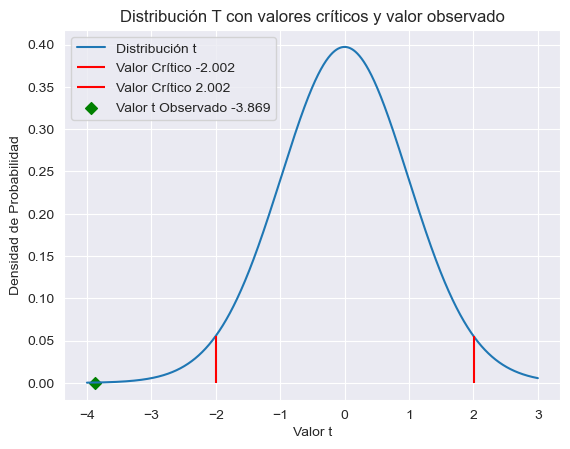

In [59]:
#EJERCICIO 2
#Apartado B

#Suponemos normalidad de los datos

#Se comprobó con el F test la homogeneidad de la varianza

#Se presuponía la independencia de las muestras

#H0: Las medias de ambas muestras son iguales M0 = M1
#H1: Las medias de ambas muestras son diferentes M0 != M1
def t_test(datos1, datos2):
    valores1 = datos1['Anchura del cráneo'].describe()
    valores2 = datos2['Anchura del cráneo'].describe()

    #Diferencia de medias, grados de libertad y error estándar
    mean_diff = valores1['mean'] - valores2['mean']
    n1 = valores1['count']
    n2 = valores2['count']
    s1 = valores1 ['std']
    s2 = valores2 ['std']
    gl = n1+n2-2
    standard_error = mt.sqrt((((n1*mt.pow(s1,2)+n2*mt.pow(s2,2))*((1/n1)+(1/n2)))/(gl)))

    #Nivel de significación, límites superior e inferior y valor crítico
    alfa_medios = 0.05/2
    lim_sup = stats.t.ppf(1-alfa_medios, gl)
    lim_inf = stats.t.ppf(alfa_medios, gl)
    valor_critico = float(mean_diff)/standard_error

    #Representación gráfica
    t_values = np.linspace(-4, 3, 10000)
    t_distribucion = stats.t.pdf(t_values, gl)
    plt.plot(t_values, t_distribucion, label='Distribución t')
    plt.vlines(lim_inf, 0, stats.t.pdf(lim_inf, gl), colors='r', label='Valor Crítico %.3f' % lim_inf)
    plt.vlines(lim_sup, 0, stats.t.pdf(lim_sup, gl), colors='r', label='Valor Crítico %.3f' % lim_sup)
    plt.scatter([valor_critico], [stats.t.pdf(valor_critico, gl)], marker='D', color='g', label=('Valor t Observado %.3f' % valor_critico))
    
    #Leyenda y estilo
    plt.legend()
    plt.xlabel('Valor t')
    plt.ylabel('Densidad de Probabilidad')
    plt.title('Distribución T con valores críticos y valor observado')
    
    plt.show()

t_test(df_1, df_2)


In [67]:
#EJERCICIO 2
#Apéndice al Apartado B

#Test de Mann Whitney U
def test_mannwhitney(datos1, datos2):
    statistic, pvalue = stats.mannwhitneyu(datos1, datos2, alternative='two-sided')

    # Mostrar resultados
    print(f"Estadístico U: {statistic:.4f}, Valor p: {pvalue:.4f}")
    if pvalue > 0.05:
        print("No hay diferencias significativas entre las medianas de las muestras.")
    else:
        print("Existen diferencias significativas entre las medianas de las muestras.")

test_mannwhitney(df_1['Anchura del cráneo'], df_2['Anchura del cráneo'])

Estadístico U: 217.5000, Valor p: 0.0003
Existen diferencias significativas entre las medianas de las muestras.
